# 目標:
學習 BASEMAP的進階應用


# 重點:

導入PANDAS, 利用PANDAS 的數據繪製關係圖

如何自行輸入經緯度繪製所在區域的地圖

學習如何讀取氣象資訊檔: netCDF4


# 作業

1. 讀入 etopo5 地形/降水量資料集: "etopo5.cdf". 繪製分布圖.


2. 延續使用者資料的導入使用, 除了, "文字檔", "網路資訊", 還有圖像檔;

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖



# 溫馨提示: 

有疑問, 請多提出來, 有專家陪跑

In [1]:
import os
os.environ['PROJ_LIB'] = 'C:\\ProgramData\\Anaconda3\\envs\\test2\\Library\\share'

In [2]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset('etopo5.cdf')

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin,lons = shiftgrid(180.,topoin,lons,start=False)


fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

im = m.imshow(topodat,cm.GMT_haxby)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])

cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

warp to orthographic map ...


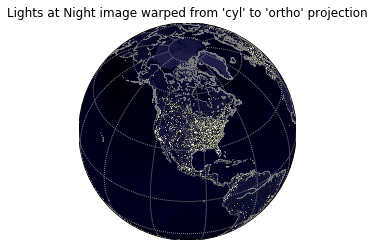

In [3]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
m.warpimage(image='earth_lights_lrg.jpg')
m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

plot native cylindrical map (no warping needed) ...


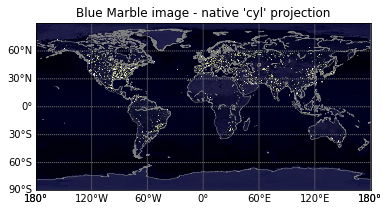

In [4]:
fig=plt.figure()
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')
m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()